In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

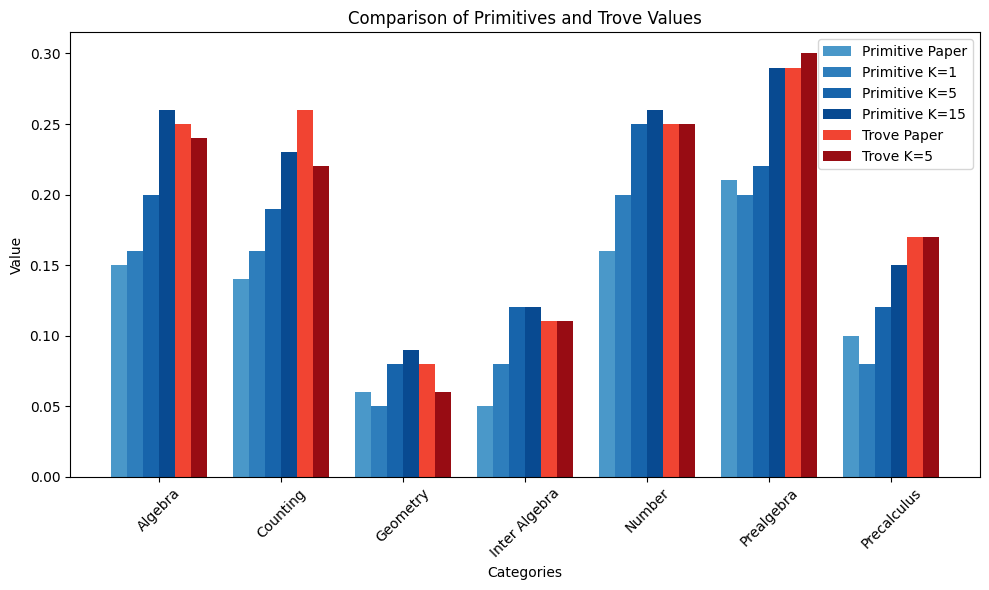

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Read the CSV file (ensure TROVE_data_new.csv is in your working directory)
df = pd.read_csv("TROVE_data_new.csv", delimiter=";", index_col=0)

# Define the desired order:
# For PRIMITIVEs: PRIMITIVE Paper, then K=1, K=5, K=15
# For TROVE: TROVE Paper then TROVE K=5
desired_order = [
    "PRIMITIVE Paper",
    "PRIMITIVE K=1",
    "PRIMITIVE K=5",
    "PRIMITIVE K=15",
    "TROVE Paper",
    "TROVE K=5",
]

# Reorder the dataframe rows according to the desired order
df_ordered = df.loc[desired_order]

# Get the list of categories (columns)
categories = df_ordered.columns.tolist()
n_categories = len(categories)
n_models = len(desired_order)

# Set positions for groups on the x-axis
x = np.arange(n_categories)
bar_width = 0.13

# Define colors using colormaps:
# PRIMITIVEs: shades of blue, TROVE: shades of red
PRIMITIVE_models = desired_order[:4]
TROVE_models = desired_order[4:]

# Generate color arrays from the colormaps (adjust the brightness as needed)
PRIMITIVE_colors = cm.Blues(np.linspace(0.6, 0.9, len(PRIMITIVE_models)))
TROVE_colors = cm.Reds(np.linspace(0.6, 0.9, len(TROVE_models)))

# Create a mapping for model names to colors
color_map = {}
for i, model in enumerate(PRIMITIVE_models):
    color_map[model] = PRIMITIVE_colors[i]
for i, model in enumerate(TROVE_models):
    color_map[model] = TROVE_colors[i]

plt.figure(figsize=(10, 6))

# Plot each row (model) with its corresponding color and an offset for grouped bars
for i, model in enumerate(desired_order):
    values = df_ordered.loc[model].astype(float)
    plt.bar(x + i * bar_width, values, width=bar_width, color=color_map[model], label=model)

plt.xlabel("Categories")
plt.ylabel("Value")
plt.title("Comparison of PRIMITIVEs and TROVE Values")
# Set x-ticks in the middle of the grouped bars
plt.xticks(x + bar_width * (n_models - 1) / 2, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

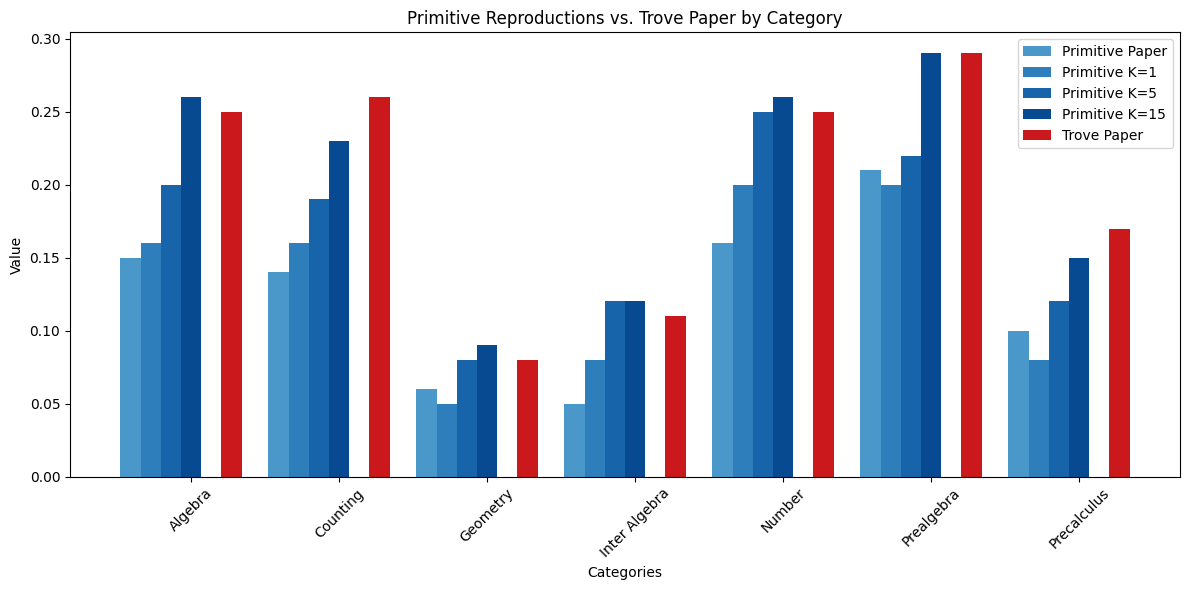

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the CSV file
df = pd.read_csv("TROVE_data_new.csv", delimiter=";", index_col=0)

# Select only the rows of interest:
# For PRIMITIVE: the paper baseline and reproductions with k=1, k=5, k=15
# For TROVE: only the paper result
methods_PRIMITIVE = ["PRIMITIVE Paper", "PRIMITIVE K=1", "PRIMITIVE K=5", "PRIMITIVE K=15"]
methods_TROVE = ["TROVE Paper"]
methods = methods_PRIMITIVE + methods_TROVE

# Subset the dataframe to these methods
df = df.loc[methods]

# The columns are the categories
categories = df.columns.tolist()
n_categories = len(categories)

# Settings for the grouped bar chart:
bar_width = 0.15       # Width of each bar
gap = 0.15             # Extra gap between PRIMITIVE group and TROVE bar
n_PRIMITIVE = len(methods_PRIMITIVE)
n_total = n_PRIMITIVE + len(methods_TROVE)  # 4 PRIMITIVEs + 1 TROVE = 5 bars per category

# Total group width per category (each group of bars for a category)
group_width = n_PRIMITIVE * bar_width + gap + bar_width

# Compute x positions for each category group; add extra spacing between groups (e.g., 0.2)
x_groups = np.arange(n_categories) * (group_width + 0.2)

plt.figure(figsize=(12, 6))

# Define colors:
# Use shades of blue for the PRIMITIVE methods, and a distinct red for TROVE.
PRIMITIVE_colors = cm.Blues(np.linspace(0.6, 0.9, n_PRIMITIVE))
TROVE_color = cm.Reds(0.75)

# Plot the bars for each category
for i, cat in enumerate(categories):
    base_x = x_groups[i]
    # Plot the four PRIMITIVE methods
    for j, method in enumerate(methods_PRIMITIVE):
        value = float(df.loc[method, cat])
        plt.bar(base_x + j * bar_width, value, width=bar_width, color=PRIMITIVE_colors[j],
                label=method if i == 0 else "")
    # Plot the TROVE paper result (with an extra gap)
    value = float(df.loc["TROVE Paper", cat])
    plt.bar(base_x + n_PRIMITIVE * bar_width + gap, value, width=bar_width, color=TROVE_color,
            label="TROVE Paper" if i == 0 else "")

# Set x-axis ticks at the center of each group
centers = x_groups + (group_width) / 2
plt.xticks(centers, categories, rotation=45)
plt.xlabel("Categories")
plt.ylabel("Value")
plt.title("PRIMITIVE Reproductions vs. TROVE Paper by Category")
plt.legend()
plt.tight_layout()
plt.show()

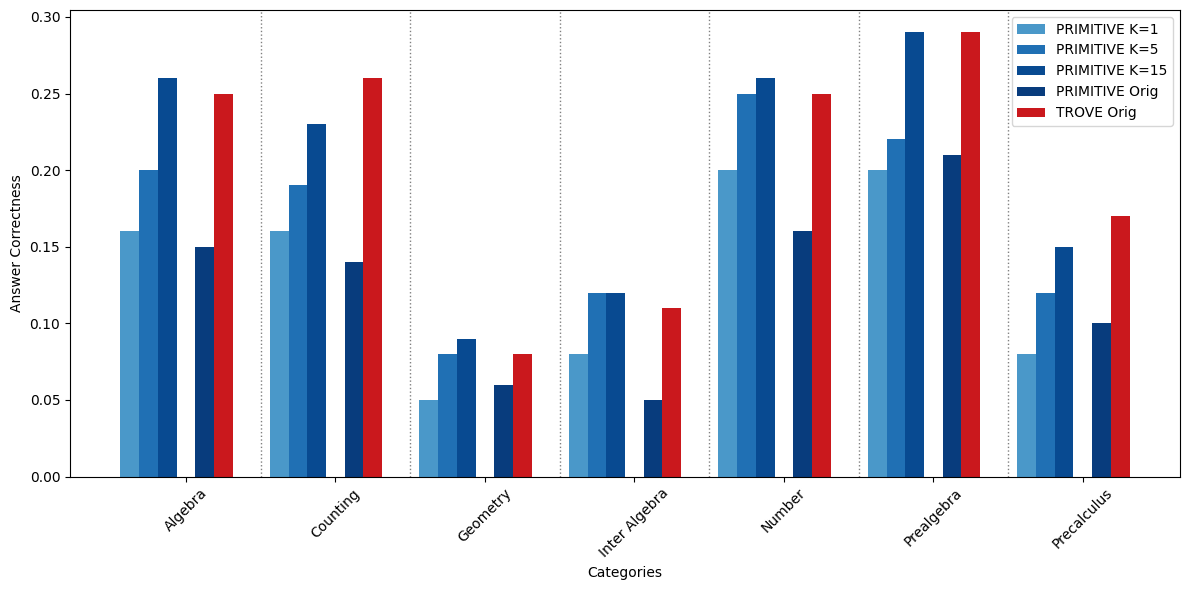

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the CSV file (make sure TROVE_data_new.csv is in your working directory)
df = pd.read_csv("Trove_data_new.csv", delimiter=";", index_col=0)

# Define the methods in the order you want:
# Group 1: Reproductions (PRIMITIVE with k=1, k=5, k=15)
methods_reprod = ["PRIMITIVE K=1", "PRIMITIVE K=5", "PRIMITIVE K=15"]
# Group 2: Baseline Paper results (PRIMITIVE Paper and TROVE Paper, placed together)
methods_baseline = ["PRIMITIVE Orig", "TROVE Orig"]

methods = methods_reprod + methods_baseline
df = df.loc[methods]  # Subset the dataframe to only these rows

# The columns are the categories (e.g., Algebra, Counting, ...)
categories = df.columns.tolist()
n_categories = len(categories)

# Define bar plot parameters:
bar_width = 0.15           # width of each bar
gap_within_group = 0.15    # gap between reproduction group and baseline group within one category
group_spacing = 0.3        # extra space between different category groups

n_reprod = len(methods_reprod)
n_baseline = len(methods_baseline)
group_width = n_reprod * bar_width + gap_within_group + n_baseline * bar_width

# Compute the starting x positions for each category group
x_groups = np.arange(n_categories) * (group_width + group_spacing)

# Define offsets for bars within each group:
# Offsets for reproduction bars (first group)
offsets_reprod = np.arange(n_reprod) * bar_width
# Offsets for baseline bars (second group), shifted right by the reproduction bars + gap
offsets_baseline = n_reprod * bar_width + gap_within_group + np.arange(n_baseline) * bar_width

# Define colors:
# For reproductions, use a blue gradient.
reprod_colors = cm.Blues(np.linspace(0.6, 0.9, n_reprod))
# For the baseline, assign distinct colors (blue for PRIMITIVE Paper, red for TROVE Paper)
baseline_colors = [cm.Blues(0.95), cm.Reds(0.75)]

plt.figure(figsize=(12, 6))

# Plot bars for each category
for i, cat in enumerate(categories):
    base_x = x_groups[i]
    # Plot reproduction bars
    for j, method in enumerate(methods_reprod):
        x_pos = base_x + offsets_reprod[j]
        value = float(df.loc[method, cat])
        plt.bar(x_pos, value, width=bar_width, color=reprod_colors[j],
                label=method if i == 0 else "")
    # Plot baseline bars
    for j, method in enumerate(methods_baseline):
        x_pos = base_x + offsets_baseline[j]
        value = float(df.loc[method, cat])
        plt.bar(x_pos, value, width=bar_width, color=baseline_colors[j],
                label=method if i == 0 else "")

# Add vertical dotted lines between category groups
for i in range(1, n_categories):
    # The vertical line is drawn between groups;
    # here we place it halfway in the spacing between the current and previous group.
    x_line = x_groups[i] - group_spacing / 2
    plt.axvline(x=x_line, color='gray', linestyle=':', linewidth=1)

# Set x-axis ticks at the center of each category group
group_centers = x_groups + group_width / 2
plt.xticks(group_centers, categories, rotation=45)
plt.xlabel("Categories")
plt.ylabel("Answer Correctness")
plt.legend()
plt.tight_layout()

plt.savefig("plot.pdf", bbox_inches="tight")

plt.show()


In [20]:
import pandas as pd
from scipy.stats import ttest_rel
import numpy as np

# Load the CSV file (adjust path if needed)
df = pd.read_csv("Trove_data_new.csv", delimiter=";", index_col=0)

# List of categories (the columns in the CSV)
categories = df.columns.tolist()

# ---------------------------
# Test 1: PRIMITIVE K=5 vs. PRIMITIVE
# ---------------------------
# Extract the values for each category as floats
values_k5 = df.loc["PRIMITIVE K=5"].astype(float)
values_primitive = df.loc["PRIMITIVE Orig"].astype(float)

# Perform a paired t-test
t_stat1, p_val1 = ttest_rel(values_k5, values_primitive)
# For one-sided test (hypothesis: PRIMITIVE K=5 > PRIMITIVE)
if t_stat1 > 0:
    p_val1_one_sided = p_val1 / 2
else:
    p_val1_one_sided = 1 - p_val1 / 2

print("Test 1: PRIMITIVE K=5 vs. PRIMITIVE")
print("Differences (K=5 - PRIMITIVE):", np.array(values_k5) - np.array(values_primitive))
print("Mean difference: {:.4f}".format((values_k5 - values_primitive).mean()))
print("t-statistic = {:.4f}, one-sided p-value = {:.4f}".format(t_stat1, p_val1_one_sided))
print()

# ---------------------------
# Test 2: TROVE vs. PRIMITIVE K=15
# ---------------------------
values_trove = df.loc["TROVE Orig"].astype(float)
values_k15 = df.loc["PRIMITIVE K=15"].astype(float)

t_stat2, p_val2 = ttest_rel(values_trove, values_k15)
# For one-sided test (hypothesis: TROVE > PRIMITIVE K=15)
if t_stat2 > 0:
    p_val2_one_sided = p_val2 / 2
else:
    p_val2_one_sided = 1 - p_val2 / 2

print("Test 2: TROVE vs. PRIMITIVE K=15")
print("Differences (TROVE - PRIMITIVE K=15):", np.array(values_trove) - np.array(values_k15))
print("Mean difference: {:.4f}".format((values_trove - values_k15).mean()))
print("t-statistic = {:.4f}, one-sided p-value = {:.4f}".format(t_stat2, p_val2_one_sided))

Test 1: PRIMITIVE K=5 vs. PRIMITIVE
Differences (K=5 - PRIMITIVE): [0.05 0.05 0.02 0.07 0.09 0.01 0.02]
Mean difference: 0.0443
t-statistic = 3.9910, one-sided p-value = 0.0036

Test 2: TROVE vs. PRIMITIVE K=15
Differences (TROVE - PRIMITIVE K=15): [-0.01  0.03 -0.01 -0.01 -0.01  0.    0.02]
Mean difference: 0.0014
t-statistic = 0.2255, one-sided p-value = 0.4145


In [22]:
import pandas as pd
from scipy.stats import ttest_rel
import numpy as np

# Load the CSV file (adjust path if needed)
df = pd.read_csv("Trove_data_new.csv", delimiter=";", index_col=0)

# List of categories (the columns in the CSV)
categories = df.columns.tolist()

# ---------------------------
# Test 1: PRIMITIVE K=5 vs. PRIMITIVE Orig
# ---------------------------
values_k5 = df.loc["PRIMITIVE K=5"].astype(float)
values_primitive = df.loc["PRIMITIVE Orig"].astype(float)  # Original baseline

t_stat1, p_val1 = ttest_rel(values_k5, values_primitive)
if t_stat1 > 0:
    p_val1_one_sided = p_val1 / 2
else:
    p_val1_one_sided = 1 - p_val1 / 2

print("Test 1: PRIMITIVE K=5 vs. PRIMITIVE (Orig)")
print("Differences (K=5 - PRIMITIVE):", np.array(values_k5) - np.array(values_primitive))
print("Mean difference: {:.4f}".format((values_k5 - values_primitive).mean()))
print("t-statistic = {:.4f}, one-sided p-value = {:.4f}".format(t_stat1, p_val1_one_sided))
print()

# ---------------------------
# Test 2: TROVE Orig vs. PRIMITIVE K=15
# ---------------------------
values_trove = df.loc["TROVE Orig"].astype(float)
values_k15 = df.loc["PRIMITIVE K=15"].astype(float)

t_stat2, p_val2 = ttest_rel(values_trove, values_k15)
if t_stat2 > 0:
    p_val2_one_sided = p_val2 / 2
else:
    p_val2_one_sided = 1 - p_val2 / 2

print("Test 2: TROVE vs. PRIMITIVE K=15")
print("Differences (TROVE - PRIMITIVE K=15):", np.array(values_trove) - np.array(values_k15))
print("Mean difference: {:.4f}".format((values_trove - values_k15).mean()))
print("t-statistic = {:.4f}, one-sided p-value = {:.4f}".format(t_stat2, p_val2_one_sided))
print()

# ---------------------------
# Test 3: TROVE vs. PRIMITIVE K=5
# ---------------------------
# This test checks if TROVE is significantly higher than PRIMITIVE K=5.
values_trove = df.loc["TROVE Orig"].astype(float)
values_k5 = df.loc["PRIMITIVE K=5"].astype(float)

t_stat3, p_val3 = ttest_rel(values_trove, values_k5)
if t_stat3 > 0:
    p_val3_one_sided = p_val3 / 2
else:
    p_val3_one_sided = 1 - p_val3 / 2

print("Test 3: TROVE vs. PRIMITIVE K=5")
print("Differences (TROVE - PRIMITIVE K=5):", np.array(values_trove) - np.array(values_k5))
print("Mean difference: {:.4f}".format((values_trove - values_k5).mean()))
print("t-statistic = {:.4f}, one-sided p-value = {:.4f}".format(t_stat3, p_val3_one_sided))

Test 1: PRIMITIVE K=5 vs. PRIMITIVE (Orig)
Differences (K=5 - PRIMITIVE): [0.05 0.05 0.02 0.07 0.09 0.01 0.02]
Mean difference: 0.0443
t-statistic = 3.9910, one-sided p-value = 0.0036

Test 2: TROVE vs. PRIMITIVE K=15
Differences (TROVE - PRIMITIVE K=15): [-0.01  0.03 -0.01 -0.01 -0.01  0.    0.02]
Mean difference: 0.0014
t-statistic = 0.2255, one-sided p-value = 0.4145

Test 3: TROVE vs. PRIMITIVE K=5
Differences (TROVE - PRIMITIVE K=5): [ 0.05  0.07  0.   -0.01  0.    0.07  0.05]
Mean difference: 0.0329
t-statistic = 2.4850, one-sided p-value = 0.0237
